In [1]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import math
import scipy.stats as stats
from scipy.special import logsumexp
 
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)
#  a hack to hide code from cell: https://github.com/damianavila/RISE/issues/32    

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CS5010 Artificial Intelligence Principles
### Lecture 10 Uncertainty
#### Probability theory
Lei Fang

University of St Andrews

# About me (the other lecturer)

Lei (pronounced as ``Lay``) Fang

* Lecturer in School of Computer Science, St Andrews
  * Background in Computer Science (1st degree)
  * Ph.D. in statistical learning stuff
* Mostly working on statistical learning, Bayesian machine learning etc nowadays
* Office in Jack Cole Building, School of Computer Science
* Email: lf28@st-andrews.ac.uk
* Office hour by appointment, either in-person or on Teams, just email me

# What to cover for the rest of the course

## Uncertainty (coming two-three weeks)

In a nutshell, use **probability theory** to
- equip machine with some uncertainty reasoning capability 
- human intelligence unconciously does it all the time, e.g.
  * we judge how likely to win a lottery and invest accordingly 
  * bring an umbrella or not by weighing the likelihood of raining

- Human also known to be notoriously bad at uncertainty reasoning
  * we will see a few examples
  
- We will have a revision on probability theory today
- Practical 2 is about uncertainty and AI
  * shall we use AI to replace some uncertainty management in society?
  * more about this later ...

## Searching (next next two weeks)

Equip machine with some problem solving skills via **searching**

- It turns out a lot of problems are just searching problem
  * with some modelling/transformation process (abstraction)
  * e.g.
    * finding a route from St Andrews to Edinburgh
    * solving a sudoku puzzle 
- Again, human uncontiously does it sometimes
  * machine is probably better than us at this for certain problems

- We will learn a range of searching algorithms
  * search is a field well studied in CS, maths and beyond
  * learning objective: be able to compare and constrast them 
    * pick a suitable algorithm for your problem
- More on this in the last two weeks

# This lecture

- Notion of uncertainty
- Probability theory

## Relevant book chapters of AI-AMA

- Chapter 13 Quantifying uncertainty
- Chapter 14 Probabilistic reasoning

# Why we need probability theory and uncertainty reasoning ?

# Let's start with a sad but relevant story 
### The case of Sally Clark - "one of the great miscarriages of justice in modern British legal history"

![Sally Clark](http://newsimg.bbc.co.uk/media/images/38744000/jpg/_38744329_clark300.jpg)
- Sally Clark, a solictor in Cheshire, also a mother of two

- Sadly, both of Sally's children died out of sudden infant death syndrome (SIDS), a rare desease with a chance at $1/8543$
- In Nov 1999, following the death of her second child, Sally Clark was convicted of murder at Chester Crown Court

A key arugment in  court: a peaedistrician professor, Sir Roy Meadow, testifying the chance of two children from an affluent family suffering cot death was 1 in 73 million $\frac{1}{8543} \times \frac{1}{8543}$
- the jurors swayed by the professor and gave a guilty verdict in 1999
- and the uncertainty reasoning (statistics) used was completely wrong 

Sally was convicted of murdering both of her infant kids

Sally Clark was eventually exonerated and freed after serving 3 years in prison

She suffered a number of severe psychiatric problems and died sadly in 2007

# Uncertain reasoning done by human intelligence

- Clearly, there are some uncertainty reasoning in Sally Clark's case

- The chance of a SIDS happening in an affuent family is 
$$\frac{1}{8541}$$
  * it means 1 out of 8541 middle class families with a child death, and the death is attributed to SIDS
  * which is the level of uncertainty or _degree of belief_

- The professor believes the chance of two children died from both SIDS is
  $$\frac{1}{8541} \times \frac{1}{8541}$$ 1 in 73 million chance
- At a surface level, this uncertainty reasoning seems "reasonable" 
- But **very wrong**, we will see why later and do the inference properly at a later lecture 

# Another example bad example: COVID vaccine protection rate
### uncertainty inference by humans

- Deaths counts due to COVID in the UK in two age groups (I cited from government SAGE report between week 32 and week 35 2021 )

| age/death | Not Vaccinated | Double Vaccinated |
| --- | --- | --- |
| 70-79 | 129 | 428 |
| 80+   | 155 | 928 |

- Anti-vac argue COVID vaccine are useless
- They claim: double vaccinated is more likely to die !
    * age 70-79, double vac death rate is $\frac{428}{428+129} = 77\%$ 
    * age 80+, $\frac{928}{928+155} = 86\%$ 
    
- Another uncertainty reasoning done by human and awfully **wrong**
  * which again looks reasonable at surface level
  * we will see how to do it properly next lecture

# But what exactly done wrong ?

# AND how to do it properly ?

## Hope the two examples have motivated you enough

We will see how to use **probability theory** to do uncertainty reasoning properly
* find the correct probability that Sally's guilty and the protection rate of COVID vaccine
* you can appreciate the importance of **probability theory** in proper reasoning

## _Before we start, something to reflect though ..._
* how easy homo-sapiens can be misled and how un-intelligent we are
* the worst: we donot realise our igorance but hold it (mostly just predudice) dearly and firmly
  * even a well respected professor made such a mistake 
* how to train a "humble" AI ? 
  * admit one's ignorance is actually intelligent!
  * same applies to AI
  * "not very sure about this case" is better than a 100\% confident but wrong answer

# Probability theory

# Probability space (the axioms)

A probability space consists of three elements $(\Omega, \mathcal{F}, P)$, _a triple_

**Sample space** $\Omega$: the set of all possible worlds
  * e.g. the result of rolling a 6 facet die $\Omega = \{1,2,3,4,5,6\}$
  ![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNZbujbNicg3RtVNQOyUxfz7HBHTWrZEbAWwCWWGakE3Plkl82Np4BxZyoaBoB6UNGHT8&usqp=CAU)

* e.g. the experiment of flipping a coin twice $\Omega = \{HH, HT, TH, TT\}$
* $\Omega$ needs to be **exhaustive** and **mutually exclusive**
  * **exhaustive**: $\Omega$ should contain all the possibilities
  * **mutually exclusive**: only one of the outcome is possible at a time

An **event** $E_i \subset \Omega$ and its collection **event space** $\mathcal{F}=\{E_i\}$
  * e.g. for the dice case, $E = \{2,4,6\}$ means the outcome is an even number
  * e.g. for the coin case, we can define an $E$ as at least one head turning up: $E=\{HH, HT, TH\}$

 * $\Omega$ is an event, called **certain event**
 * $\emptyset$ is also an event, **null event**
 * the collection of events we *care about* is called **event space** $\mathcal{F}=\{E_i\}$
   * for a discrete sample space, the event space can simply be $2^\Omega$
     * 6 facet die example, $\mathcal{F} = \{\emptyset, \{1\}, \{2\}, \ldots, \{1,2,3,4,5,6\}\}$
     * coin tossing (one toss) example, $\mathcal{F} = \{\emptyset, \{H\}, \{T\}, \{H,T\}\}$


A **probability measure** $P(\cdot)$: that assigns event $E_i \in \mathcal{F}$ a probability 
  * $P$ must satisfy: 
    * $P(\Omega) = 1$ (certain event) and 
    * $0\leq P(E) \leq 1$ for any $E$
    * $P(E_1 \cup E_2)=P(E_1) + P(E_2)$ if $E_1$ and $E_2$ are mutually exclusive

In [4]:
# hide_code_in_slideshow()
# v = venn2([set(['A', 'B']), set(['D', 'E'])], set_labels=("E1", "E2"), alpha=1) 
# for idx, subset in enumerate(v.subset_labels):
#     if v.subset_labels[idx] is not None:
#         v.subset_labels[idx].set_text("P(E"+ str(idx+1) +")")
#         v.subset_labels[idx].set_visible(False)
# Change Backgroud
# plt.gca().set_facecolor('skyblue')
# plt.gca().set_axis_on(); plt.title("mutually exclusive events"); 
# plt.show();
# plt.savefig('mutexclusive.png', bbox_inches='tight')

<center><img src="./figs/mutexclusive.png" width = "600" height="600"/></center>

If $E_1$ and $E_2$ are not mutually exclusive, 

$$P(E_1 \cup E_2) = P(E_1) + P(E_2) - P(E_1 \cap E_2)$$

In [5]:
# hide_code_in_slideshow()
# v2 = venn2([set(['A', 'C', 'D']), set(['D', 'F', 'E'])], set_labels=("E1", "E2"), alpha=1) 
# v2.subset_labels[0].set_text("P(E1)")
# v2.subset_labels[1].set_text("P(E2)")
# v2.subset_labels[2].set_text("P(E1^E2)");
# plt.gca().set_facecolor('skyblue');
# plt.gca().set_axis_on();
# plt.title("counter case mutually inclusive");
# plt.show()
# plt.savefig('notmutexclusive1.png', bbox_inches='tight')

<center><img src="./figs/notmutexclusive.png" width = "500" height="400"/></center>

# Caculate event's probability based on the triple 

For the experiment of die throwing 
  * $\Omega = \{1,2,3,4,5,6\}$
  * Events: elements of the power set of $\Omega$: $\mathcal{F} = \{\emptyset,  \{1\}, \{2\}, \{3\}, \ldots, \Omega\}$ ($2^6$ elements!)
  * Probability measure: if the die is fair, the singleton events' probabilities are $P(\{1\}) = P(\{2\}) = ... =P(\{6\})=1/6$
  <center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/dievenn.png" width = "600" height="600"/></center>

* What's the probability that an even number showing up:
  * $E_{even}=\{2,4,6\} = \{2\} \cup \{4\} \cup \{6\}$; and the singleton events are disjoint

$P(\text{Even number}) = P(\{2,4,6\}) = P(\{2\})+P(\{4\}) + P(\{6\}) = 1/6 + 1/6 +1/6 = 1/2$  

$P(\text{Odd number}) = P(\{1,3,5\}) = P(\{1\}) + P(\{3\}) + P(\{5\}) = 1/6 + 1/6 +1/6 = 1/2$

$P(\text{Even number} \cup \text{Odd number}) = P(\text{Even number}) + P(\text{Odd number}) = 1/2 +1/2=1$
  * the two events,$\{2,4,6\}$ (orange cells) and $\{1,3,5\}$ (green cells) are disjoint
  <center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/dievenn2.png" width = "600" height="600"/></center>

# Calculate event's probability based on probability triple

The axioms, or probability triple, are not the most convenient tool to use in practice
  * for example, tossing a coin 10,000 times and calculate the probability $E=\{\omega: \text{the heads turn up more than half}\}$ or $E=\{\omega: \text{the number of heads turns up is an even number}\}$
  * the sample space $\Omega$ has $2^{10000}$ elements, from $HHHH\ldots$ to $TTTT\ldots$

We need more convenient tool: namely _random variables_ 
  * if we are interested in the total count of 10000 tosses, assume $H=1$ and $T=0$
  and $$X_i =\begin{cases} 1, & \text{the ith toss is Head} \\ 0, & \text{the ith toss is Tail}\end{cases}$$
  * $X = \sum_{i=1}^{10000} X_i$ is the _random variable_ we want to work with
  * more on this next ...

# Random variable and probability distribution

- Formally, a random variable $X$ is a mapping from $\Omega$ to some possible value range $\mathcal{A}_x$
  * if $\mathcal{A}_x$ is discrete, $X$ is called a *discrete random variable*, e.g. result of one coin tossing 0 (tail),1 (head)
  * if $\mathcal{A}_x$ is continuous, $X$ is called a *continuous random variable*, e.g. Gaussian 
- A random variable $X$ is also associated with a probability distribution $P(X)$, which satisfies
$$P(X=x) \geq 0 \;\text{for all}\; x\in \mathcal{A}_x,\; \text{and} \sum_{x\in \mathcal{A}_x} P(X=x) =1$$

- Notation: $P(x)$  is a shorthand notation for $P(X=x)$
- Capital letter $X,Y, \texttt{Pass}, \texttt{Weather}$ are random variables; 
- smaller letters $x,y, true, false, cloudy, sunny$ are particular values r.v.s can take  

Example 1 
  * For a coin tossing example, $\Omega=\{H, T\}$, let random variable $$X = \begin{cases} 1 & \omega = H \\ 0 & \omega =T,\end{cases}$$ in other words, $X(H) = 1$ and $X(T) = 0$ are mappings 
    * $X$: a _mapping_ from $\Omega$ to $\mathcal{A}_x =\{0,1\}$
    * the associated probability distrbution is $P(X=1) = p$ and $P(X=0) = 1-p$, for some $0\leq p \leq 1$
    * e.g. $p=0.7$, a bent coin 

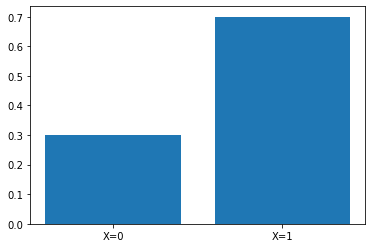

In [6]:
# hide_code_in_slideshow()
names = ['X=0', 'X=1']; p =0.7;
values = [1-p, p]
plt.bar(names, values); plt.show();

Example 2

Toss a coin 3 times, $\Omega = \{HHH, HHT, HTH, THH, HTT, THT, TTH, TTT\}$ 

Define a r.v. $X$ as the number of times head turns up 
  * then $X(TTT) =0$, $X(THT) = 1$, $X(TTH) = 1, \ldots$
  * the possible value for $X$: $\mathcal{A}_x = \{0,1,2,3\}$  

  * the probability distribution is 
    $P(X = 0) = P(\{TTT\}) = (1-p)^3$; $P(X = 1) = P(\{HTT, THT, TTH\}) = 3 \times (1-p)^2 p$; $P(X = 2) = P(\{HHT, HTH, THH\}) = 3 \times (1-p) p^2$; 
  * note that $X=x$ actually defines an event, e.g. $X=3$ is $\{HTT, THT, TTH\}$ which is an event  
  * note that $$P (X) \geq 0\; \text{and}\; P(X = 0) + P(X = 1) + P(X = 2) + P(X=3) = 1$$

  * for a bent coin with $p=0.7$, the distribution looks like below

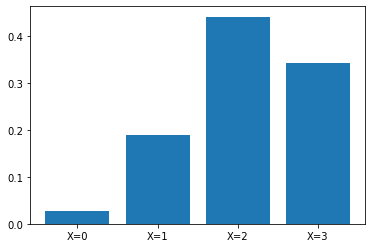

In [7]:
p = 0.7; n=3; names = ["X=" + str(number) for number in range(n+1)]; 
values = binom.pmf(np.arange(n+1), n, p).tolist()
plt.bar(names, values); plt.show();

In general, the number of heads $X$ showing up for $n$ tosses of a coin with a head probabilty $p$ is a **Binomial distribution** $$P(X=x) = \binom{n}{x} (1-p)^{n-x} p^{x}$$
  * $\binom{n}{x}$ is binomial coefficient, e.g. $\binom{3}{2} = 3$: i.e. out of the three tosses, how many ways to see head twice: HHT, HTH, THH
  * the plot below is tossing $n= 10$ times with each success probability $p=0.7$
  * key intuition: $P$ tells how likely you are going to see a result of $X=x$
    * in this example, the most likely result, called *mode* is 7
    * you are almost impossible to observe $X=0$, i.e. all 10 tosses are tail, the probability is $0.3^{10}$

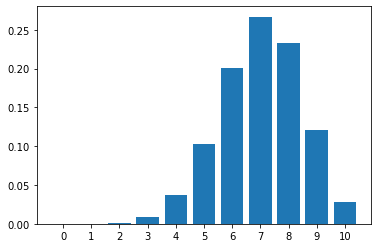

In [8]:
p = 0.7; n=10; names = [str(number) for number in range(n+1)]; 
values = binom.pmf(np.arange(n+1), n, p).tolist()
plt.bar(names, values); plt.show();

For the 10000 tossing case, 

- what's probability of more head than tail ?
 $$P(\text{more heads than tail}) = P(X > 5000) = \sum_{x > 5000}P(X=x)$$
 
- what's the probability of even number of head shows up ?
 $$P(\text{even toss}) = P(X = \{2,4,6,\ldots, 10000\}) = \sum_{x\in \{2,4,\ldots, 10000\}} P(X=x)$$

In [9]:
p = 0.7; n=10000; 
# using log probability to avoid underflow, imagine timing 0.7 or 0.3 10k times! 
values = binom.logpmf(np.arange(n+1), n, p)
# calculate back the probability in normal sense
# logsumexp calculates log \sum_{i} exp(x_i) more numerically stably 
p_moreheads = np.exp(logsumexp(values[5001:]))
p_even = np.exp(logsumexp(values[::2]))

Example 3 (Continuous random variable, Gaussian)

Remember if $\mathcal{A}_x$ is continuous, the random variable is called a continuous r.v.
   * For example Gaussian random variable $x$ has a distribution $$p(X=x) = N(x; \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma} \right)^2}$$
   * Note that $p(x)>0$ and $\int_{-\infty}^{\infty} p(x) dx = 1$ (need to do some integration here)
   * One can calculate the probability by integration
   $p(X\in (a, b)) = \int_{a}^{b} p(x) dx$

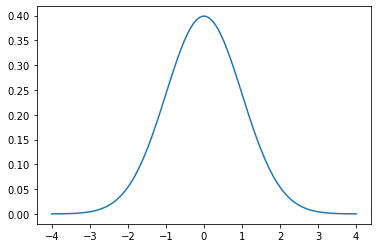

In [10]:
mu = 0; variance = 1; sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma)); plt.show();

# In practice, we don't need to worry about the probability triple

* We care about the r.v. and its distribution (rather than the implied probability triple)
* Previous Gaussian r.v. is an example, we didn't specify its $(\Omega, P_\omega, \mathcal{F})$
* Here is another example of categorical random variable, $X\in \mathcal{A}_x$ where $\mathcal{A}_x = \{a,b,c\ldots, z, \_\}$
  - the English alphabet plus empty space "\_"
  - the following is the probability distribution of alphabet in an English text
  - it basically tells you $\_$, e, i, n, o are more likely to be used than e.g. letter z

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/figure21.png" width = "800" height="1000"/></center>

* as expected, letters $\texttt{a, e, i} \ldots$ are among the most popular letters used in English text

# Joint probability and random variables 

- It is common to work multiple random variables at the same time
  * e.g. $X$, $Y$ are the random variables of two die tossing 
  * or bigrams, $X$ is the first letter $Y$ is the following letter 
    * e.g. "student" has following bigrams: st, tu, de, en, nt
    * for bigram "$st$", $X=s$ and $Y=t$

- A joint event: denotd as $X,Y$: seperated by ",", means when X, Y are jointly true
  * some write : $X \wedge Y$
  * dice example: $X = 3$, $Y = 6$: the first toss is 3 and second toss is 6
 
<!--   * Bigram: $X = s, Y = t$, denotes the bigram observed is "$st$" -->

- The probability distribution of the joint random variable then is
$$P(X, Y)$$
  * it gives the probability of the joint event is true
  * dice example, $P(X =3, Y=6) = \frac{1}{36}$
 
- Joint distribution is a valid probability distribution: satisfies 
$$P(X, Y) \geq 0 \text{ and } \sum_{x}\sum_{y} P(X=x, Y=y) = 1$$

  * $6\times 6$ entries for $P(X, Y)$ of two dice tossing
  
|X, Y       | 1   | 2    | 3 | 4 | 5  |  6  |
| ---   | --- |  --- |---|---|--- | --- |
| 1   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
| 2   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
| 3   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
| 4   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
| 5   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
| 6   | 1/36 |  1/36 |1/36|1/36|1/36 | 1/36 |
  
  * it is a valid probability distribution
    * all positive $P(X, Y) \geq 0$
    * and $\sum_{x,y\in \{1,\ldots,6\} } P(X=x, Y=y) = 36 \times \frac{1}{36} = 1$

* For the bigram case: 
  * remember $X,Y$ represents the first and second letter,
  * so $X = s, Y = t$, denotes a bigram "$st$"

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/figure19.png" width = "600" height="600"/></center>

  * there are $27 \times 27$ entries
  * very common bigrams are "in", "re", "he", "th", "\_a" (starting with "a")
  * uncommon bigrams are "aa", "az", "tb", "j\_" (ending with "j")
  * sum all $27\times 27$ entries will be 1

# Probability rule 1: marginal probability

There are only two rules

* summation rule or marginalisation
$$P(X) = \sum_{y}P(X, Y=y);\;\; P(Y) = \sum_{x}P(X=x, Y),$$
  * $P(X), P(Y)$ are called marginal probability

| X, Y       | 1   | 2    | 3 | 4 | 5  |  6  | P(X)|
| ---   | --- |  --- |---|---|--- | --- | --- |
| 1   | <span style="color:blue">1/36</span> |  <span style="color:blue">1/36</span>  |<span style="color:blue">1/36</span>|<span style="color:blue">1/36</span>|<span style="color:blue">1/36</span> | <span style="color:blue">1/36</span> |  <span style="color:blue">1/6</span>|
| 2   |<span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 3   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 4   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 5   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 6   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
|P(Y) | <span style="color:black">1/6</span>  | 1/6   | 1/6  | 1/6 | 1/6 | 1/6|   


* the marginal distribution of the first throw is $P(X)$
$$P(\color{blue} {X = 1} ) = \sum_{y= \{1,2,\ldots,6\}} \color{blue} {P(X=1, Y=y)} = 6 \times \color{blue} {\frac{1}{36}} = \color{blue} {\frac{1}{6}}$$
  * sum over the first row  

  
* the marginalisation is also called: summing over
  * collapsing the other dimension

| X, Y       | 1   | 2    | 3 | 4 | 5  |  6  | P(X)|
| ---   | --- |  --- |---|---|--- | --- | --- |
| 1   | <span style="color:red">1/36</span> |  <span style="color:black">1/36</span>  |<span style="color:black">1/36</span>|<span style="color:black">1/36</span>|<span style="color:black">1/36</span> | <span style="color:black">1/36</span> |  <span style="color:black">1/6</span>|
| 2   |<span style="color:red">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 3   | <span style="color:red">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 4   | <span style="color:red">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 5   | <span style="color:red">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 6   | <span style="color:red">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
|P(Y) | <span style="color:red">1/6</span>  | 1/6   | 1/6  | 1/6 | 1/6 | 1/6|   

* the marginal distribution of the second throw is $P(Y)$


$$P(\color{red} {Y = 1}) = \sum_{x= \{1,2,\ldots,6\}} \color{red} {P(X=x, Y=1)} = 6 \times \color{red} {\frac{1}{36}} = \color{red} {\frac{1}{6}}$$
  * sum over the first column

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs//Figure_2.3.png" width = "600" height="600"/></center>

# Conditional probability 

Before we introduce the second rule, we need a concept called conditional probability, denoted as 

$$P(X|Y=y):$$ 

* the probability of event X occurring given that we know event Y=y to have occurred
* in short, the probability of X given Y

Conditional probability is a very useful concept for probabilistic inference

* inference: $P(\texttt{Burglar}|\texttt{Alarm})$, $P(\text{COVID}|\texttt{Test} = positive)$, 
* prediction (inference over a future event): $P(\texttt{Rain_today}|\texttt{Rain_yesterday})$

Conditional probability of $X$ given $Y$ can be calculated:

$$P(X=x|Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)} = \frac{P(X=x, Y=y)}{\sum_x P(X=x, Y=y)}$$

  * the ratio between joint and marginal probability

In [11]:
# hide_code_in_slideshow()
# v3 = venn2([set(['A', 'B', 'D']), set(['D', 'C', 'E'])], set_labels=("", ""), alpha=1) 
# v3.subset_labels[0].set_text("P(X=x)")
# v3.subset_labels[1].set_text("P(Y=y)")
# v3.subset_labels[2].set_text("P(X=x,Y=y)");plt.gca().set_facecolor('skyblue');plt.gca().set_axis_on();plt.title("counter case mutually inclusive");
# plt.show()
# plt.savefig('conditionalprob.png', bbox_inches='tight')

<center><img src="E:\郭重良\St Andrews\CS5010\Lecture\L10\figs\conditionalprob.png" width = "600" height="600"/></center>

  * note that $P(X|Y=y)$ is a valid distribution of $X$:
  $$P(X|Y=y) >0\;\; \text{and}\;\; \sum_{x}P(X=x|Y=y) = 1$$
  * given a joint distribution, the conditional is just the normalised row/column!

# Conditional probability example COVID vaccine

| age/death | Not Vaccinated | Double Vaccinated |
| --- | --- | --- |
| 80+   | 155 | 928 |

Define 
* `Vac` $\in \{true, false\}$: random variable whether a 80+ is double vaccinated or not
* `Death` $\in \{true, false\}$: r.v. a 80+ died due to COVID

The true protection rate is actually: $$P(\texttt{Death}=true|\texttt{Vac}=true) = \frac{P(\texttt{Death}=true, \texttt{Vac}=true)}{P(\texttt{Vac}=true)}$$


<center><img src="./figs/covidvac.png" width = "800" height="600"/></center>

$$P(\texttt{Death}=true|\texttt{Vac}=true) = \frac{P(\texttt{Death}=true, \texttt{Vac}=true)}{P(\texttt{Vac}=true)} = \frac{\frac{928}{3 \times 10^6}}{\frac{2.94\times 10^6}{3 \times 10^6}}= 0.032\%$$

$$P(\texttt{Death}=true|\texttt{Vac}=false) = \frac{P(\texttt{Death}=true, \texttt{Vac}=false)}{P(\texttt{Vac}=false)} = \frac{\frac{155}{3 \times 10^6}}{\frac{0.06\times 10^6}{3 \times 10^6}}= 0.26\%$$

# Conditional probability example 

Bigram example
 * left: $P(y|x)$: conditional probability of the second letter given the first letter
    * each row sum to one
    * e.g. check $P(y|x = \texttt{q})$: the 17th row 
      * it tells us it is very likely to see $\texttt{u}$ following $\texttt{q}$: i.e. $\texttt{qu}$
      * also very likely to see $\texttt{q}\_$: i.e. bigrams end with $\texttt{q}$, say Iraq, BBQ?

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/figure20.png" width = "1000" height="600"/></center>

* right $P(x|y)$: conditional probability of the first letter given second 
  * each column sum to one
  * e.g. check $P(x|y = \texttt{q})$: the 17th column
    * conditional probability of the first letter given the second letter is $\texttt{q}$
    * the top three entries are ${x} = \texttt{a}, \texttt{e}, \_$: i.e. $\texttt{aq, eq}$ and bigrams start with $\texttt{q}$

# Probability rule 2: product rule

Product rule or chain rule 
$$P(X, Y) = P(X)P(Y|X);\;\; P(X, Y) = P(Y)P(X|Y)$$

  * the chain order doesn't matter
  * joint distribution factorised as a product
  

For joint distribution for more than two r.v.s  

$$P(X, Y, Z) = P(X)P(Y|X)P(Z|X, Y)$$

# Independence and independent random variables

If $X,Y$ are independent, then $$P(X,Y) = P(X)P(Y)$$

One can show that if $X,Y$ are independent, then $$P(X|Y) = P(X)$$
  * intuition: knowing (conditional on $Y$) does not change the probability
  * can you prove it by using the probability probability rules ?

#### Let's go back to Sally Clark's case
- The professor believes the chance of two children died from both SIDS is
  $$\frac{1}{8541} \times \frac{1}{8541}$$ 1 in 73 million chance
  
- He has assumed the two events are independent, let $C_1 = \text{SIDs}$ (and $C_2$) be the first (second) child's cause of death is SIDS, $C_1 = murder$ means dies from murder, the expert has assumed
$$P(C_1= \text{SIDs}, C_2= \text{SIDs}) = P(C_1= \text{SIDs}) P(C_2= \text{SIDs})$$
  * do you agree ?

Not really!
- genetic runs in family
- environment factors also have a play (they breathe the same air, eat the same food etc.)

If the first child dies from one disease, the second's risk is increased!
- same as parents have diabetes, you are more likely to have it

Rather, we should use chain rule:
$$P(C_1, C_2) = P(C_1) P(C_2|C_1)$$

- $P(C_2=\text{SIDs}|C_1=\text{SIDs})$ turns out to be 10 times larger !

$$P(C_1=\text{SIDs}, C_2=\text{SIDs}) = P(C_1=\text{SIDs}) P(C_2=\text{SIDs}|C_1=\text{SIDs}) = 10\times r^2$$


# Verify independence from joint distribution

Independence : $$P(X,Y) = P(X)P(Y)$$

| X,Y       | 1   | 2    | 3 | 4 | 5  |  6  | P(X)|
| ---   | --- |  --- |---|---|--- | --- | --- |
| 1   | <span style="color:black">1/36</span> |  <span style="color:black">1/36</span>  |<span style="color:black">1/36</span>|<span style="color:black">1/36</span>|<span style="color:black">1/36</span> | <span style="color:black">1/36</span> |  <span style="color:black">1/6</span>|
| 2   |<span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 3   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 4   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 5   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
| 6   | <span style="color:black">1/36</span> |  1/36 |1/36|1/36|1/36 | 1/36 |  1/6|
|P(Y) | <span style="color:black">1/6</span>  | 1/6   | 1/6  | 1/6 | 1/6 | 1/6|   


  * marginalisation: find $P(X)$ and $P(Y)$
  * check $P(X=x, Y=y) = P(X=x)P(Y=y)$

# Verify indepedence from conditional distribution 


We can also check indepedence from the conditional distribution

Note that if $X,Y$ are independent, then $P(X|Y) = P(X)$

Question, is the bigram model independent ?

<center><img src="https://leo.host.cs.st-andrews.ac.uk/figs/figure20.png" width = "900" height="600"/></center>

* No! the column of $P(x|y)$ are all drastically different!
  * knowing the second letter changes the distribution of the first $\Rightarrow$ NOT Independent
  * if independent, we'd expect all columns are the same $P(x|y) = P(x)$
  * the rows of $P(x|y)$ are also drastically different

# Summary 

* Probability theory
* Random variables and their distributions
* Two rules 
  * sum rule
  * product rule 

# Next time 

- Baye's rule
  * just conditional probability 
  * tackle the two problems: Sally Clark and COVID case
- Probabilistic inference 
  * as an inverse problem 
- Some simple uncertainty based machine intelligence examples 
  * Naive Baye's classifier: classify spam emails 
  * Concept learning machine: can machine mimic your prediction ?